In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch.nn.functional as F


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Transform PIL image into a tensor. The values are in the range [0, 1]
t = transforms.ToTensor()
print(type(t))

# Load datasets for training and testing.
mnist_training = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_val = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=t)


<class 'torchvision.transforms.transforms.ToTensor'>


100%|██████████| 9912422/9912422 [00:04<00:00, 2420274.14it/s]


Extracting /tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4364621.09it/s]


Extracting /tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2296320.81it/s]


Extracting /tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7885152.64it/s]

Extracting /tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/mnist/MNIST/raw



In [4]:

image, label = mnist_training[0]
print(type(image))


# Example: If image is just [28, 28], reshape it to [1, 1, 28, 28]


<class 'torch.Tensor'>


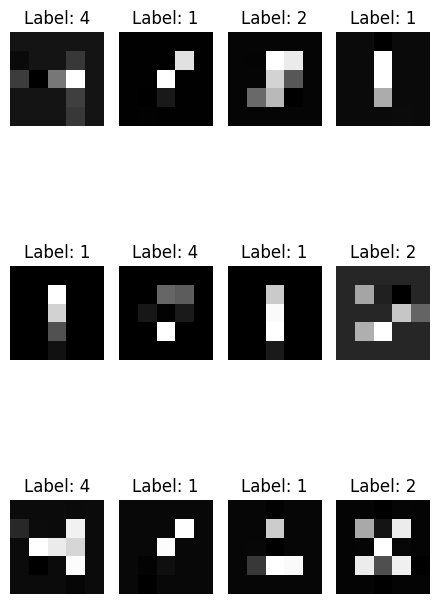

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(1.5*3, 2*4))
j=0
for i, ax in enumerate(axes.flatten()):
    j+=1
    image, label = mnist_training[j]          # returns PIL image with its labels
    while label not in {1, 4, 2}:
        j+=1
        image, label = mnist_training[j] 
    image = image.unsqueeze(0)
    resized_image = F.interpolate(image, size=(5, 5), mode='bicubic', align_corners=False)
    resized_image = resized_image.squeeze(0).squeeze(0)

    ax.set_title(f"Label: {label}")
    ax.imshow(resized_image, cmap='gray')  # Display the resized image
    ax.axis('off')
plt.tight_layout()
plt.show()